In [1]:
import matplotlib.style
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import numpy as np
from nilearn import datasets
from nilearn import plotting
import nibabel as nib
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from neurolang import frontend as fe

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/amachlou/git/neurolang/neurolang/expression_pattern_matching.py:54: UserWarning: Warning in class FirstOrderLogicSolver overwrites {'universal_predicate', 'existential_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6

Example of how to translate the sulci file

`blender_obj_to_gifti -i 101309_L.obj -r 101309.L.pial.32k_fs_LR.surf.gii -o 101309.L.manual_drawings.func.gii`

`blender_obj_to_gifti -i 101309_L.obj -r 101309.L.pial.32k_fs_LR.surf.gii -o 101309.L.manual_drawings.func.gii -p ".*(sulcus|fissure|Fissure|primus)*."`

In [2]:
destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])
destrieux_dataset['labels']

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
           (  2, b'L G_and_S_occipital_inf'),
           (  3, b'L G_and_S_paracentral'),
           (  4, b'L G_and_S_subcentral'),
           (  5, b'L G_and_S_transv_frontopol'),
           (  6, b'L G_and_S_cingul-Ant'),
           (  7, b'L G_and_S_cingul-Mid-Ant'),
           (  8, b'L G_and_S_cingul-Mid-Post'),
           (  9, b'L G_cingul-Post-dorsal'),
           ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
           ( 12, b'L G_front_inf-Opercular'),
           ( 13, b'L G_front_inf-Orbital'),
           ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
           ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
           ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
           ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
           ( 22, b'L G_oc-temp_med-Lingual'),
           ( 23, b'L G_oc-temp_med-Parahip'), ( 24, b'L G_orbital'),
  

In [3]:
surface = nib.load('107321.L.pial.32k_fs_LR.surf.gii')
vertices = surface.darrays[0].data
manual_sulci_gii = nib.load('107321.LH.manual_drawings.func.gii')
manual_sulci = dict()
for darray in manual_sulci_gii.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices[darray.data.nonzero()]
    manual_sulci[name] = points
    print(f"{name}: number of points {points.shape[0]}")

Angular_sulcus: number of points 237
Superior_occipital_sulcus: number of points 155
Intraparietal_sulcus: number of points 359
Inferior_occipital_sulcus: number of points 68
Anterior_vertical_ramus_lateral_fissure: number of points 45
Anterior_horizontal_ramus_lateral_fissure: number of points 82
Frontomarginal_sulcus: number of points 70
Temporopolar_sulcus: number of points 56
Paracingulate_sulcus: number of points 251
Superior_temporal_sulcus: number of points 518
Superior_rostral_sulcus: number of points 163
Superior_parietal_sulcus: number of points 204
Superior_frontal_sulcus: number of points 258
Subparietal_sulcus: number of points 363
Rhinal_sulcus: number of points 48
Precentral_sulcus: number of points 610
Postcentral_sulcus: number of points 444
Parieto_occipital_sulcus: number of points 208
Paracentral_sulcus: number of points 76
Orbital_H_shaped_sulcus: number of points 207
Olfactory_sulcus: number of points 111
Occipitotemporal_sulcus: number of points 185
Marginal_sulc

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.LH.manual_drawings.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [4]:
nl = fe.RegionFrontend()

for name, points in manual_sulci.items():
    ijk_points = nib.affines.apply_affine(np.linalg.inv(destrieux_map.affine), points).astype(int)
    region = fe.ExplicitVBR(
        ijk_points,
        destrieux_map.affine,
        img_dim=destrieux_map.shape
    )
    nl.add_region(region, result_symbol_name=f'manual_{name}')

In [5]:
star_lines = [
    {
        'y': [0.5, 0.5],
        'z': [0, 1],
        'interval': [3 / 2.0, 2]
    },
    {
        'y': [0, 1],
        'z': [0, 1],
        'interval': [0.5, 3 / 2.0]
    },
    {
        'y': [0, 1],
        'z': [0.5, 0.5],
        'interval': [-0.5, 0.5]
    },
    {
        'y': [0, 1],
        'z': [1, 0],
        'interval': [-3/2.0, -0.5]
    },
]

In [6]:
AI_PS_sulci = set()
Vertical_sulci = set()
PI_AS_sulci = set()
Longitudinal_sulci = set()

In [7]:
def plot_single_sulcus(sulcus_name):
    data = manual_sulci[sulcus_name]
    # only take (y, z) coordinates of sulcus
    data = data[:, 1:]
    data = MinMaxScaler().fit_transform(data)
    y = data[:, 0].reshape(-1, 1)
    z = data[:, 1].reshape(-1, 1)
    lr = LinearRegression().fit(y, z)
    f = lambda u: lr.intercept_ + lr.coef_[0] * u
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    yplot = np.linspace(0, 1)
    for s in star_lines:
        is_the_line = (
            lr.coef_[0] >= s['interval'][0] and
            lr.coef_[0] <= s['interval'][1]
        )
        lw = 2.0 if is_the_line else 1.0
        ls = '-' if is_the_line else '--'
        c = 'b' if is_the_line else 'k'
        ax.plot(s['y'], s['z'], c=c, ls=ls, lw=lw)
    ax.add_artist(
        plt.Circle((0.5, 0.5),
                   0.3,
                   color='k',
                   ls='dashed',
                   fill=False,
                   linewidth=1.0)
    )
    y_coef = lr.coef_[0]
#         if -0.5 > y_coef > -2:
#             print('AI/PS')
#         elif -2 > y_coef > 2:
#             print('Vertical')
#         elif 2 > y_coef > 0.5:
#             print('AS/PI')
#         elif 0.5 > y_coef > -0.5:
#             print('Longitudinal')
    ax.scatter(y, z, marker='.')
    ax.plot(
        yplot,
        f(yplot),
        c='r',
        label='linear_regression: z = {} + {} y'.format(
            lr.intercept_, lr.coef_[0]
        )
    )
    y_coef = lr.coef_[0]
#     print(y_coef)
    for sulc in nl.region_names:
        if sulcus_name in sulc:
            if -0.5 > y_coef > -2:
#                 print('AI/PS')
                AI_PS_sulci.add(nl.symbols[sulc])
            elif -2 > y_coef > 2:
#                 print('Vertical')
                Vertical_sulci.add(nl.symbols[sulc])
            elif 2 > y_coef > 0.5:
#                 print('AS/PI')
                PI_AS_sulci.add(nl.symbols[sulc])
            elif 0.5 > y_coef > -0.5:
#                 print('Longitudinal')
                Longitudinal_sulci.add(nl.symbols[sulc])

    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_title(f'{sulcus_name} PCA main direction')
    ax.legend()
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

    fig.savefig(f'/tmp/star_plot_{sulcus_name}.pdf')

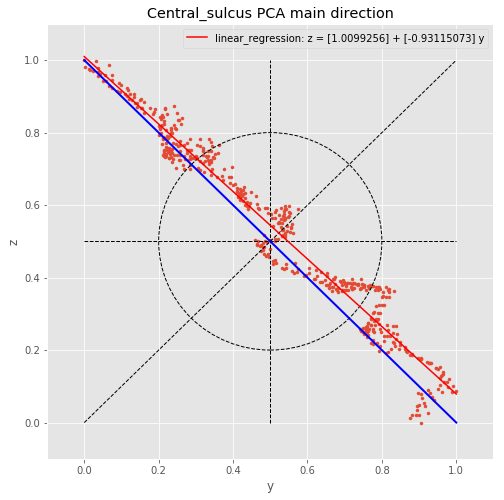

In [8]:
plot_single_sulcus('Central_sulcus')

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


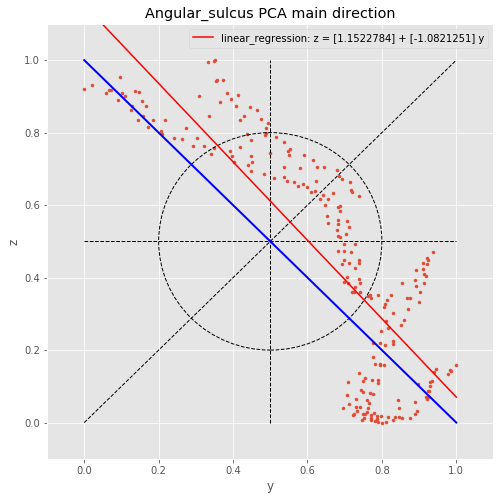

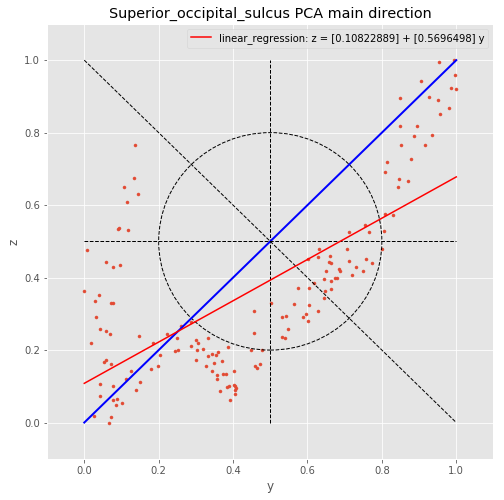

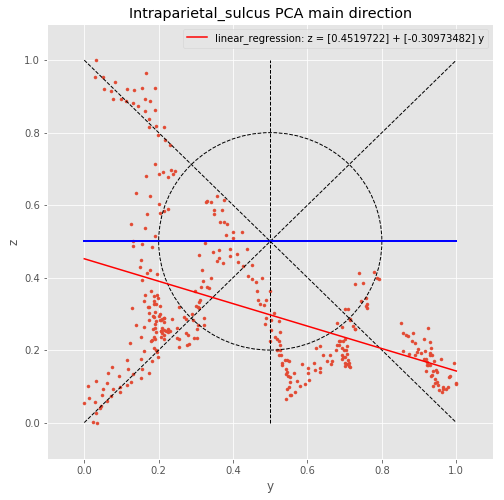

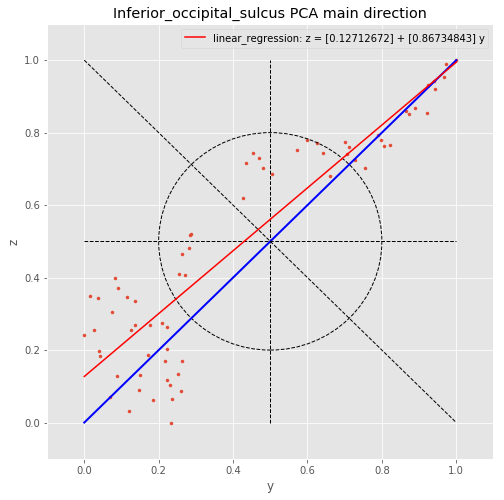

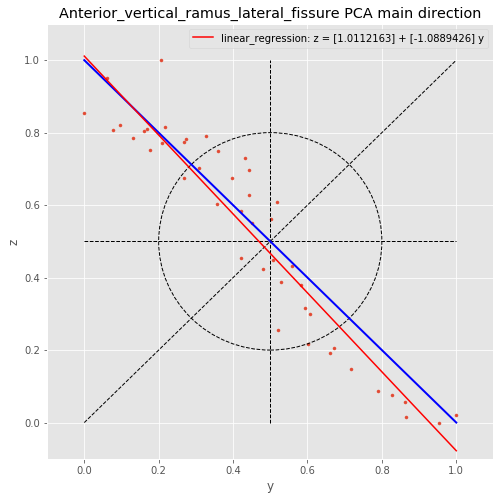

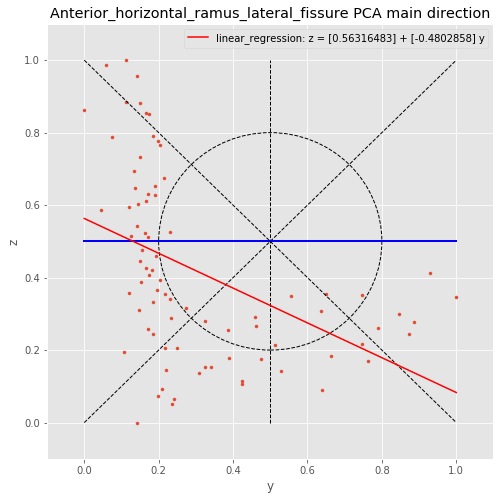

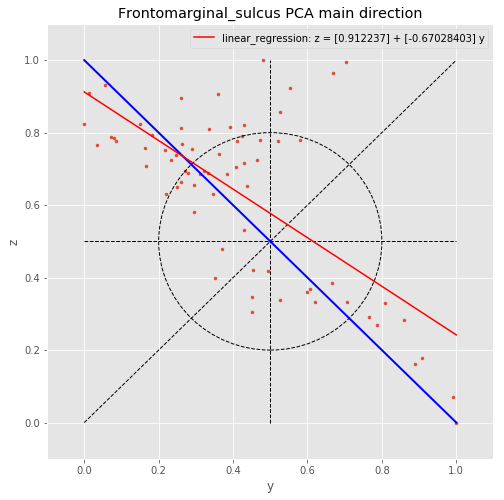

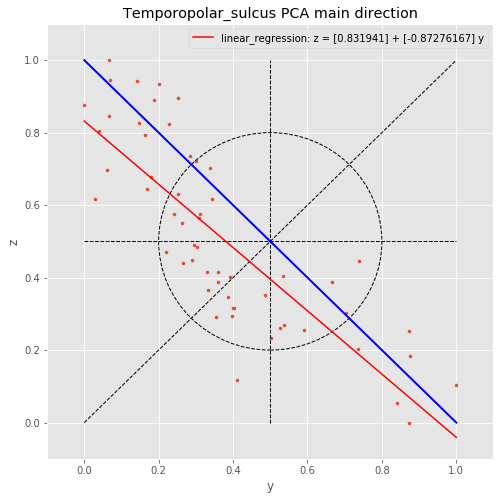

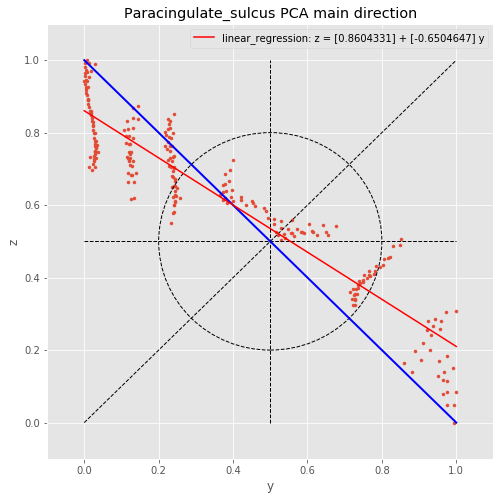

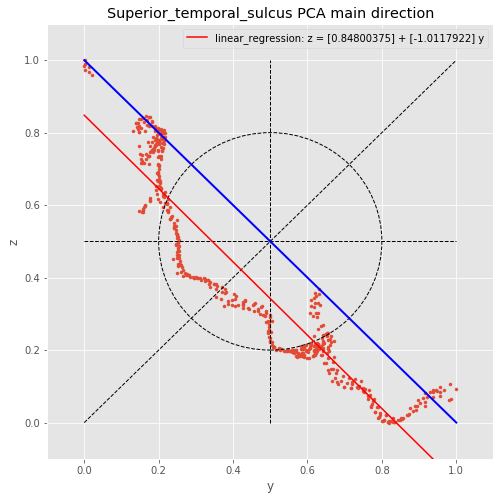

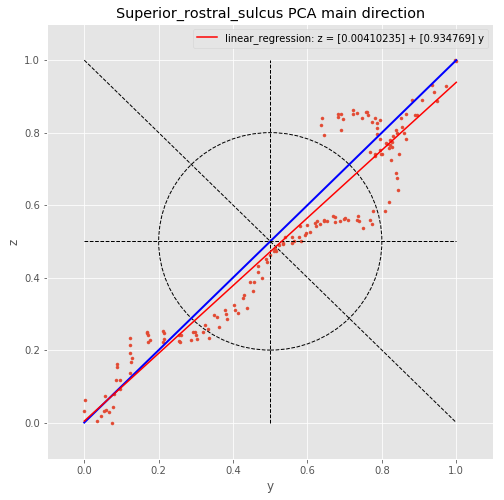

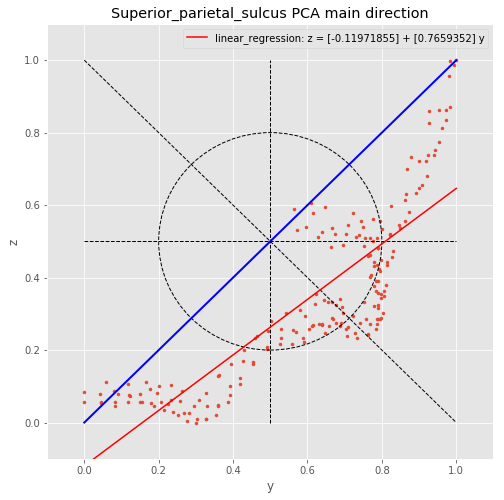

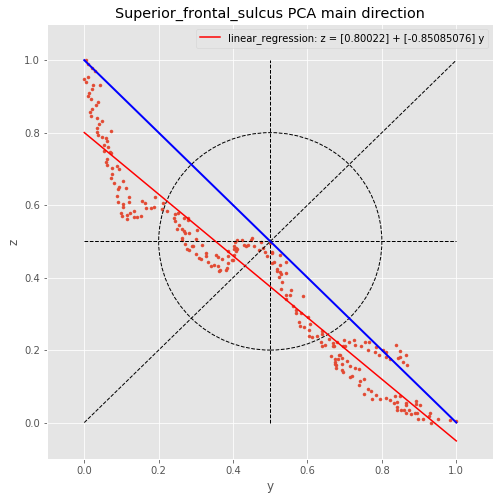

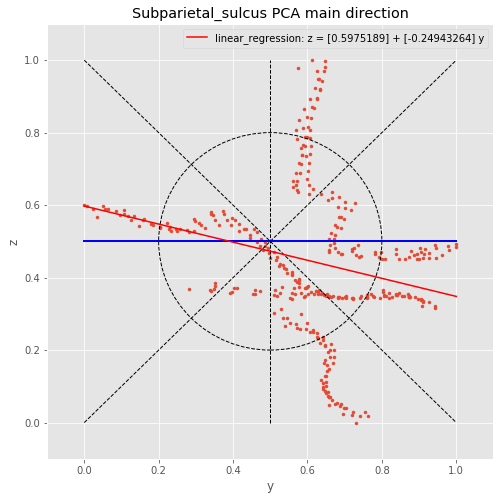

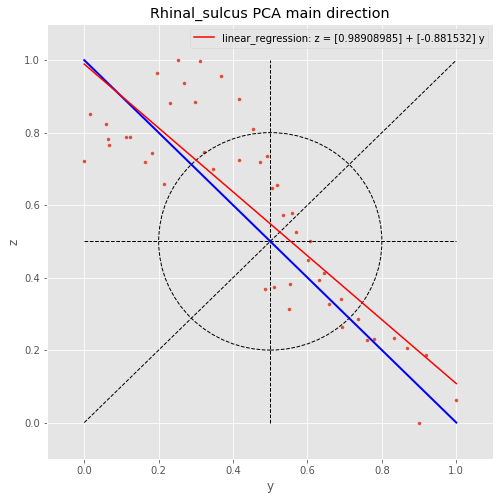

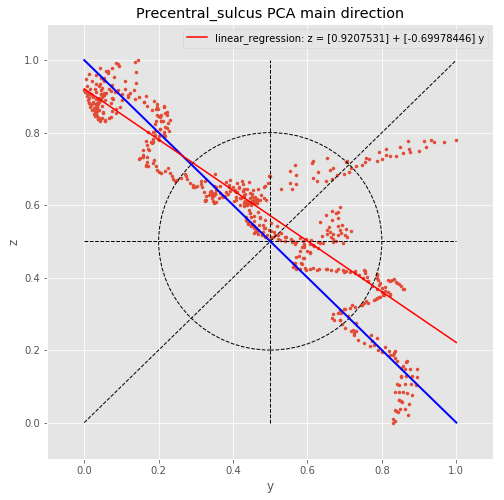

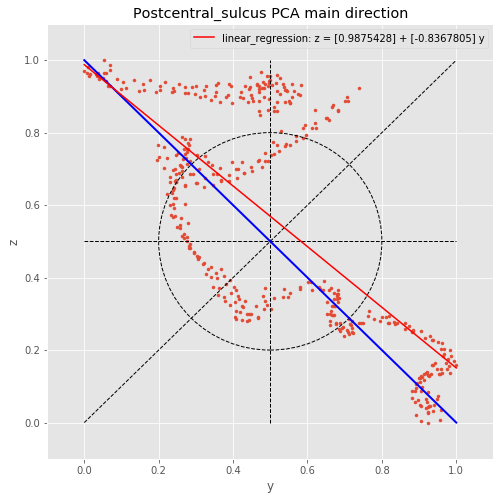

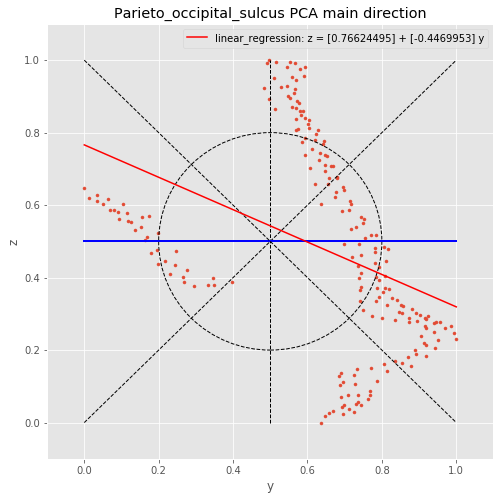

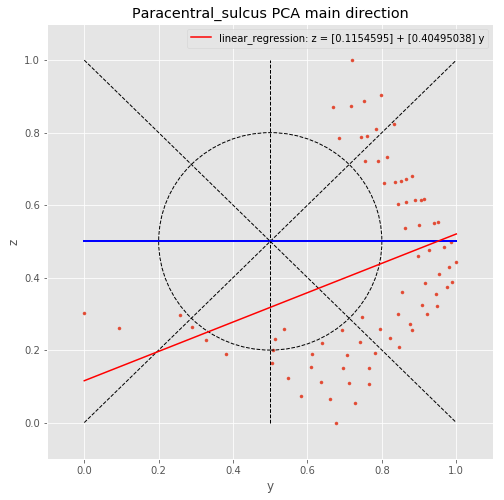

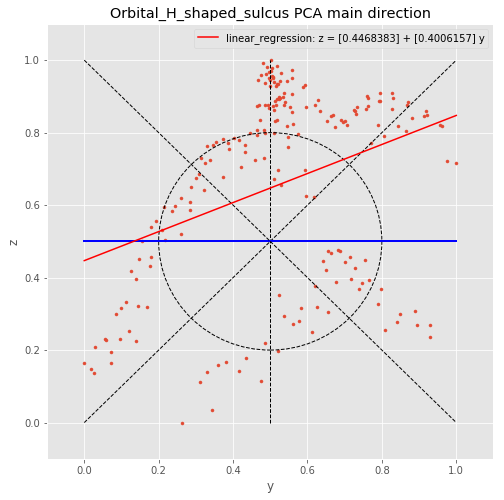

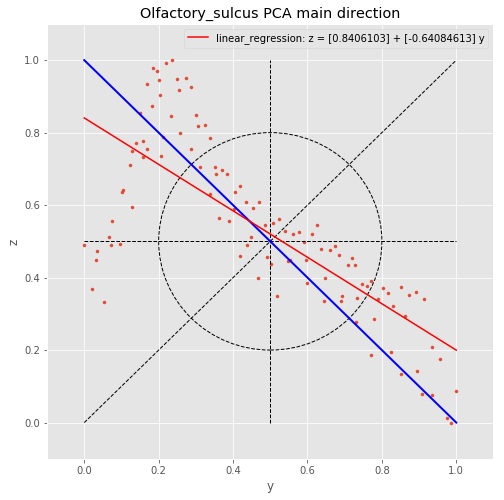

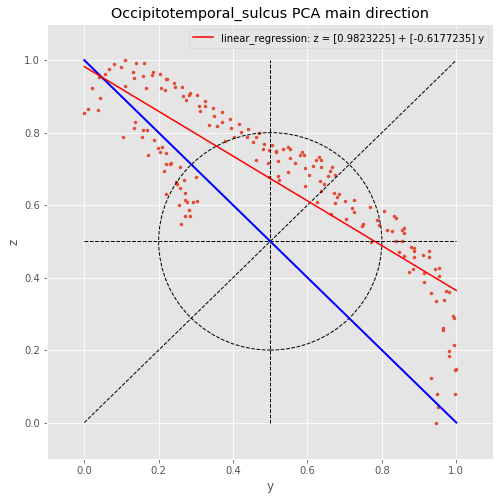

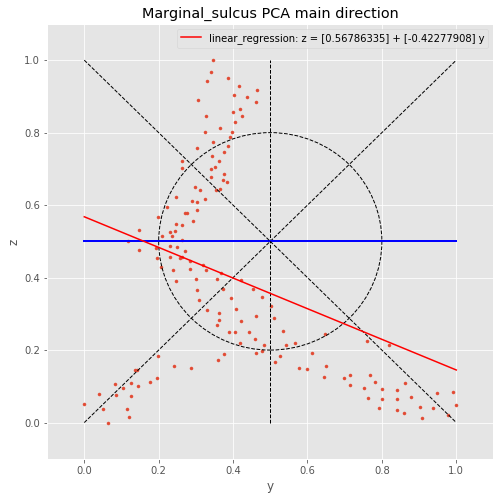

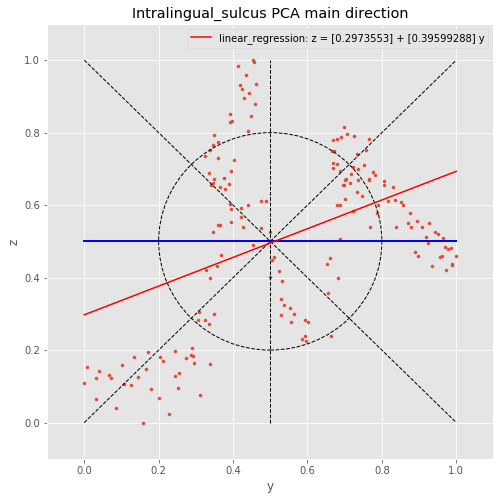

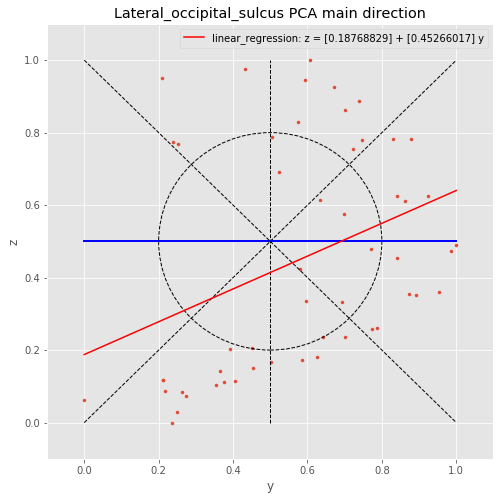

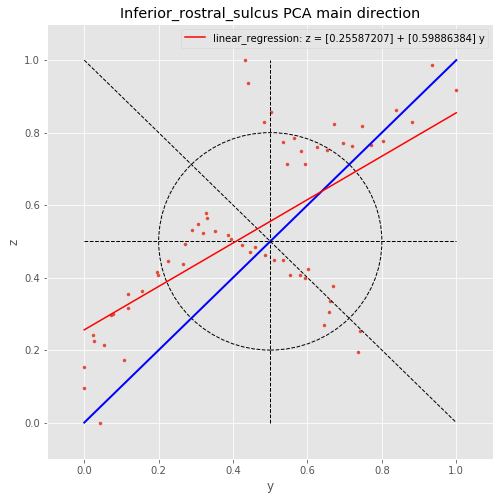

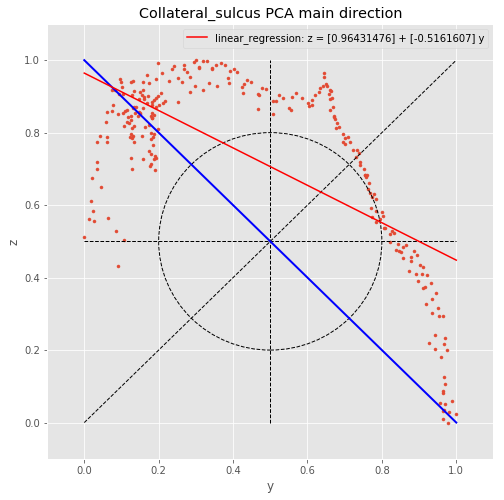

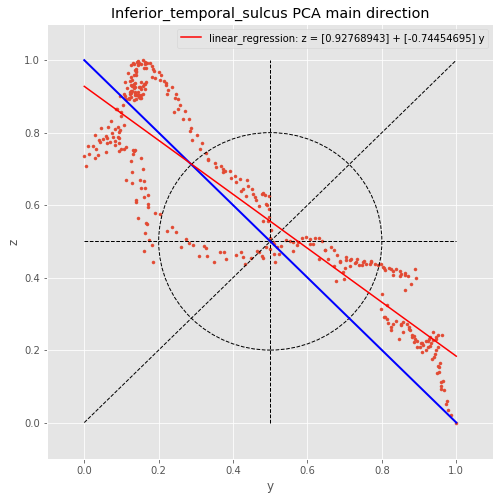

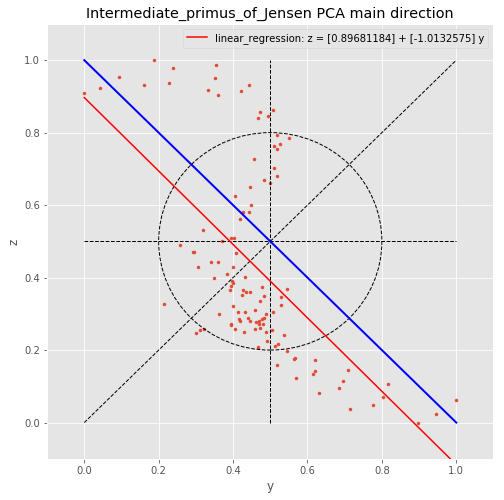

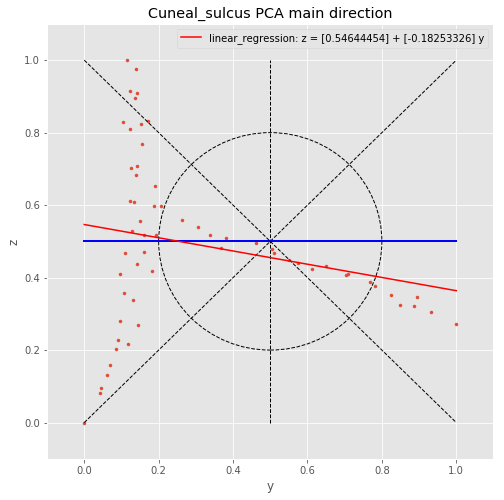

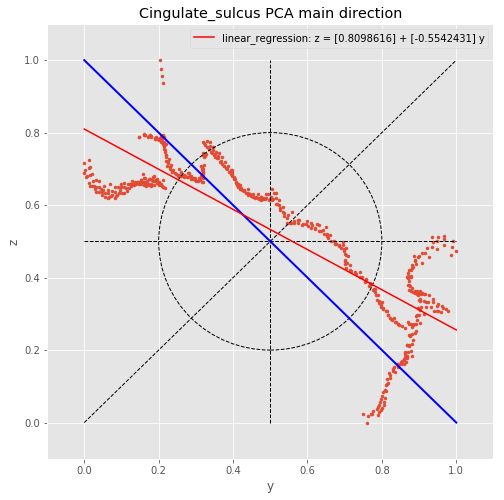

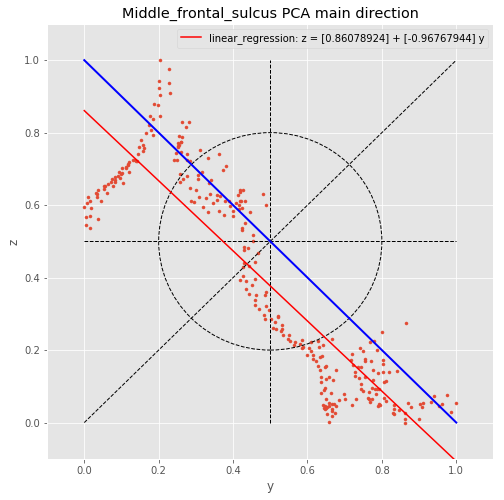

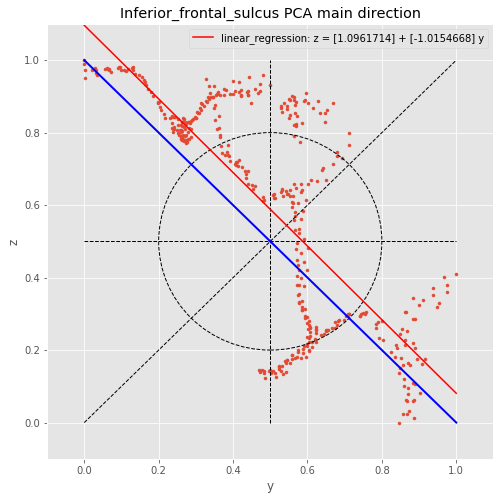

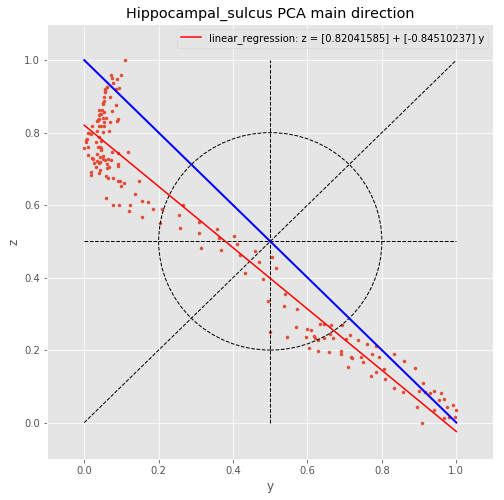

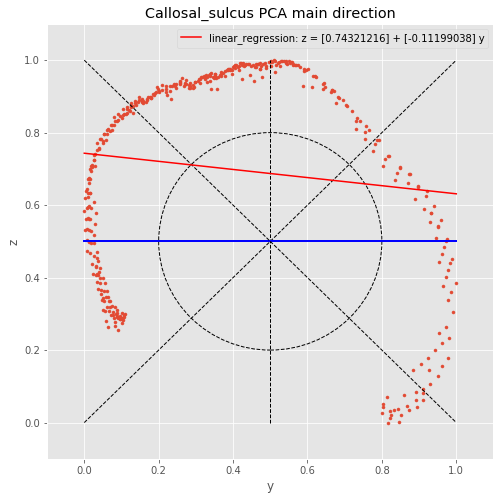

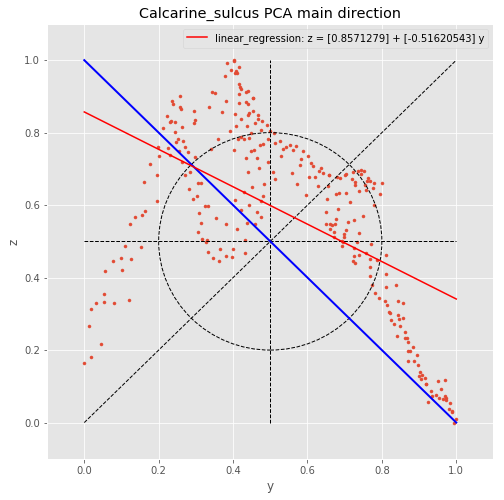

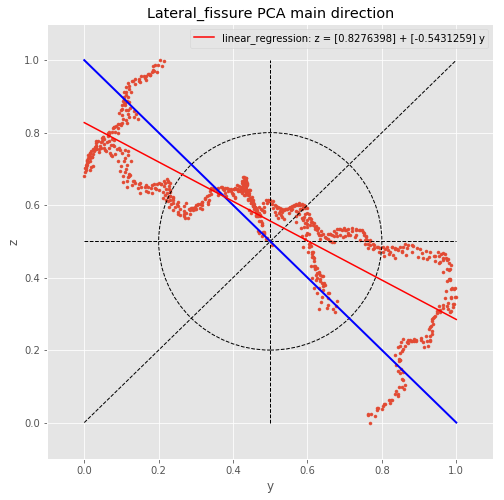

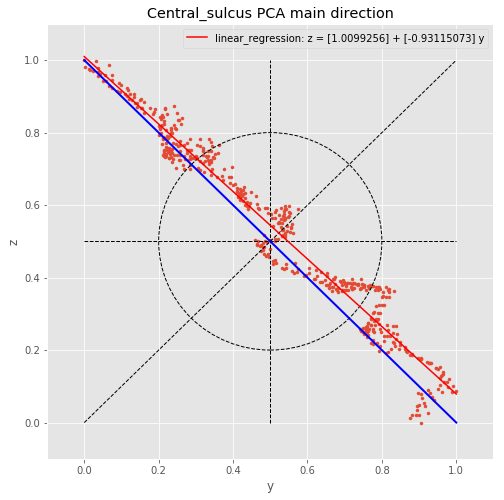

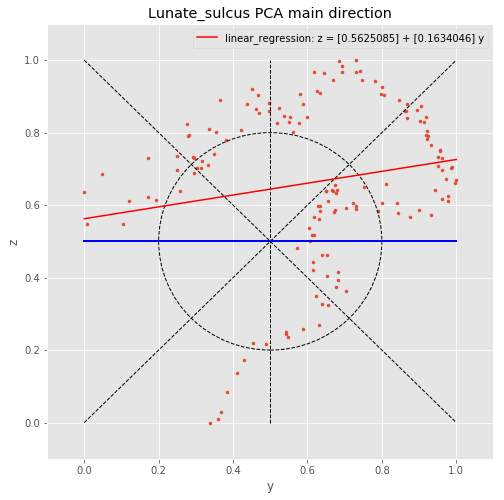

In [9]:
for sulcus_name in manual_sulci.keys():
    plot_single_sulcus(sulcus_name)

In [10]:
anteroinf_posterosup = nl.add_region_set(AI_PS_sulci, name='anteroinf_posterosup')
vertical = nl.add_region_set(Vertical_sulci, name='vertical')
posteroinf_anterosup = nl.add_region_set(PI_AS_sulci, name='posteroinf_anterosup')
longitudinal = nl.add_region_set(Longitudinal_sulci, name='longitudinal')

In [11]:
nl.symbols.anteroinf_posterosup

anteroinf_posterosup: typing.AbstractSet[neurolang.regions.Region] = ['manual_Collateral_sulcus', 'manual_Frontomarginal_sulcus', 'manual_Angular_sulcus', 'manual_Lateral_fissure', 'manual_Rhinal_sulcus', 'manual_Superior_temporal_sulcus', 'manual_Central_sulcus', 'manual_Inferior_temporal_sulcus', 'manual_Postcentral_sulcus', 'manual_Temporopolar_sulcus', 'manual_Calcarine_sulcus', 'manual_Cingulate_sulcus', 'manual_Occipitotemporal_sulcus', 'manual_Superior_frontal_sulcus', 'manual_Anterior_vertical_ramus_lateral_fissure', 'manual_Inferior_frontal_sulcus', 'manual_Olfactory_sulcus', 'manual_Paracingulate_sulcus', 'manual_Hippocampal_sulcus', 'manual_Intermediate_primus_of_Jensen', 'manual_Precentral_sulcus', 'manual_Middle_frontal_sulcus']

# Primary sulci


In [12]:
Primary_Sulci = set()

In [13]:
for manual_sulcus_name in nl.region_names:
    if ('Lateral_fissure' in manual_sulcus_name
        or 'Parieto_occipital' in manual_sulcus_name
        or 'ramus_lateral_fissure' in manual_sulcus_name
        or 'Central_sulcus' in manual_sulcus_name
        or 'Calcarine_sulcus' in manual_sulcus_name
        or 'Callosal_sulcus' in manual_sulcus_name):
        Primary_Sulci.add(nl.symbols[manual_sulcus_name])

In [14]:
primary_sulci = nl.add_region_set(Primary_Sulci, name='primary_sulci')

## Visualisation

In [15]:
central_sulcus = nl.symbols.manual_Central_sulcus

plotting.view_img(
    central_sulcus.value.spatial_image(), title=central_sulcus.symbol_name,
    symmetric_map=False
)

/home/amachlou/.local/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


# Surfaces


In [16]:
Medial_surface_sulci = set()
Lateral_surface_sulci = set()
Ventral_surface_sulci = set()

for manual_sulcus_name in nl.region_names:
    if ('Callosal' in manual_sulcus_name
        or 'Parieto_occipital' in manual_sulcus_name
        or 'Cingulate' in manual_sulcus_name 
        or 'alcarine' in manual_sulcus_name 
        or 'Marginal' in manual_sulcus_name
        or 'Paracingulate' in manual_sulcus_name
        or 'erior_rostral' in manual_sulcus_name
        or 'Paracentral' in manual_sulcus_name
        or 'Subparietal' in manual_sulcus_name
        or 'Cuneal' in manual_sulcus_name
        or 'Intralingual' in manual_sulcus_name
        or 'Intralimbic' in manual_sulcus_name
        or 'Medial_frontal' in manual_sulcus_name):
        Medial_surface_sulci.add(nl.symbols[manual_sulcus_name])
    elif ('Central' in manual_sulcus_name
        or 'Lateral_fissure' in manual_sulcus_name
        or 'ramus_lateral_fissure' in manual_sulcus_name
        or 'Precentral' in manual_sulcus_name
        or 'Postcentral' in manual_sulcus_name 
        or 'Superior_frontal' in manual_sulcus_name 
        or 'Inferior_frontal' in manual_sulcus_name
        or 'Middle_frontal' in manual_sulcus_name
        or 'Frontomarginal' in manual_sulcus_name
        or 'subcentral' in manual_sulcus_name
        or 'Intraparietal' in manual_sulcus_name
        or 'Intermediate_primus' in manual_sulcus_name
        or 'Superior_parietal' in manual_sulcus_name
        or 'Superior_occipital' in manual_sulcus_name
        or 'Inferior_occipital' in manual_sulcus_name 
        or 'Lateral_occipital' in manual_sulcus_name 
        or 'Lunate' in manual_sulcus_name
        or 'Superior_temporal' in manual_sulcus_name
        or 'Inferior_temporal' in manual_sulcus_name
        or 'Anterior_occipital' in manual_sulcus_name
        or 'Angular' in manual_sulcus_name
        or 'Medial_frontal' in manual_sulcus_name):
        Lateral_surface_sulci.add(nl.symbols[manual_sulcus_name])
    elif ('Occipitotemporal' in manual_sulcus_name
        or 'Collateral' in manual_sulcus_name
        or 'Rhinal' in manual_sulcus_name 
        or 'Parahippocampal' in manual_sulcus_name 
        or 'Hippocampal' in manual_sulcus_name
        or 'Olfactory' in manual_sulcus_name
        or 'rbital' in manual_sulcus_name
        or 'Temporopolar' in manual_sulcus_name):
        Ventral_surface_sulci.add(nl.symbols[manual_sulcus_name])
    else:
        print(manual_sulcus_name)

In [17]:
lateral_sulci = nl.add_region_set(Lateral_surface_sulci, name='lateral_sulci')
medial_sulci = nl.add_region_set(Medial_surface_sulci, name='medial_sulci')
ventral_sulci = nl.add_region_set(Ventral_surface_sulci, name='ventral_sulci')

# Secondary sulci


## Superior Rostral Sulcus

In [18]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anterior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.inferior_of(x, nl.symbols.manual_Callosal_sulcus) &
        ~nl.symbols.superior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.isin(x, medial_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, posteroinf_anterosup)
        
    )
)

res = q.do()
print(res)
print(len(res))



/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9599e1d2-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Inferior_rostral_sulcus']
1


## Cingulate Sulcus

In [19]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anterior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.inferior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.isin(x, medial_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup)        
    )
)

res = q.do()
print(res)
print(len(res))



/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9599e1d3-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Paracingulate_sulcus', 'manual_Cingulate_sulcus']
2


## Subparietal Sulcus

In [20]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.posterior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
#         nl.symbols.inferior_of(x, nl.symbols.manual_Marginal_sulcus) &
        nl.symbols.isin(x, medial_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, longitudinal)       
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9599e1d4-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Subparietal_sulcus']
1


## Occipitotemporal sulcus

In [87]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.inferior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Central_sulcus) &
#         nl.symbols.left_of(x, nl.symbols.manual_Orbital_H_shaped_sulcus) &
        nl.symbols.isin(x, ventral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) #& 
#         nl.symbols.isin(x, anteroinf_posterosup)        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


4f2ab5ce-35eb-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Collateral_sulcus', 'manual_Occipitotemporal_sulcus']
2


## Inferior Temporal Sulcus

In [85]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
#         nl.symbols.anatomical_inferior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.posterior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup)
        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


44b82392-35eb-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Inferior_frontal_sulcus', 'manual_Angular_sulcus', 'manual_Middle_frontal_sulcus', 'manual_Postcentral_sulcus', 'manual_Superior_temporal_sulcus', 'manual_Intermediate_primus_of_Jensen', 'manual_Precentral_sulcus', 'manual_Inferior_temporal_sulcus']
8


In [86]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.inferior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup)
        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


4966b548-35eb-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Inferior_temporal_sulcus']
1


## Superior Frontal sulcus

In [30]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anterior_of(x, nl.symbols.manual_Precentral_sulcus) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Anterior_horizontal_ramus_lateral_fissure) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup)      
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9963dda5-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Superior_frontal_sulcus', 'manual_Middle_frontal_sulcus']
2


## Hippocampal sulcus

In [31]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Calcarine_sulcus) &
        nl.symbols.isin(x, ventral_sulci) &
        ~nl.symbols.isin(x, primary_sulci)
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9963dda6-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Occipitotemporal_sulcus']
1


## Angular sulcus

In [78]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.posterior_of(x, nl.symbols.manual_Lateral_fissure) &
        ~nl.symbols.left_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup)       
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


2592e308-35eb-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Angular_sulcus']
1


## Cuneal sulcus

In [77]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
#         nl.symbols.inferior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Calcarine_sulcus) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Callosal_sulcus) &
#         ~nl.symbols.inferior_of(x, nl.symbols.manual_Calcarine_sulcus) &
        ~nl.symbols.superior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.isin(x, medial_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, longitudinal)
        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


20b985a8-35eb-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Cuneal_sulcus', 'manual_Intralingual_sulcus']
2


## Collateral sulcus

In [40]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.right_of(x, nl.symbols.manual_Anterior_horizontal_ramus_lateral_fissure) &
        nl.symbols.isin(x, ventral_sulci) &
        ~nl.symbols.isin(x, primary_sulci)
        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9cf039c3-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Collateral_sulcus', 'manual_Occipitotemporal_sulcus']
2


## Paracingulate sulcus

In [41]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.isin(x, medial_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup) 
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9cf039c4-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Paracingulate_sulcus']
1


## Precentral sulcus

In [57]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.posterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.inferior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup)
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


cc5ff1f4-35ea-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Superior_temporal_sulcus', 'manual_Precentral_sulcus']
2


## Postcentral sulcus

In [43]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
#         nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Precentral_sulcus) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup) 
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9e1b9865-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Postcentral_sulcus', 'manual_Superior_temporal_sulcus', 'manual_Precentral_sulcus']
3


## Inferior Frontal Sulcus

In [53]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Lateral_fissure) &
        ~nl.symbols.right_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) & 
        nl.symbols.isin(x, anteroinf_posterosup)
        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


bc7cca78-35ea-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Superior_frontal_sulcus', 'manual_Inferior_frontal_sulcus', 'manual_Middle_frontal_sulcus']
3


## Superior temporal sulcus

In [48]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
#         nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Anterior_horizontal_ramus_lateral_fissure) &
#         nl.symbols.anatomical_inferior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.superior_of(x, nl.symbols.manual_Calcarine_sulcus) &
        nl.symbols.isin(x, lateral_sulci) &
        ~nl.symbols.isin(x, primary_sulci) &
        nl.symbols.isin(x, anteroinf_posterosup)
        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9f2c09cb-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Inferior_frontal_sulcus', 'manual_Angular_sulcus', 'manual_Postcentral_sulcus', 'manual_Superior_frontal_sulcus', 'manual_Superior_temporal_sulcus', 'manual_Intermediate_primus_of_Jensen', 'manual_Precentral_sulcus', 'manual_Middle_frontal_sulcus']
8


## Marginal sulcus

In [52]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Callosal_sulcus) &
        nl.symbols.anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
#         ~nl.symbols.anterior_of(x, nl.symbols.manual_Central_sulcus) &
#         nl.symbols.right_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, medial_sulci) &
        ~nl.symbols.isin(x, primary_sulci) &
        nl.symbols.isin(x, longitudinal)
        
    )
)

res = q.do()
print(res)
print(len(res))

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


a189dcfe-35e2-11e9-8567-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['manual_Paracentral_sulcus', 'manual_Marginal_sulcus']
2
